# Snippets para personalizar el contenido de nuestras visualizaciones

## Preparación

#### Importar librerías

In [62]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap

import seaborn as sns

#### Cargar dataset

In [3]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Mostrar visualización por defecto

In [7]:
species_count = df['species'].value_counts().reset_index()

Un gráfico por defecto:

<Axes: xlabel='species', ylabel='count'>

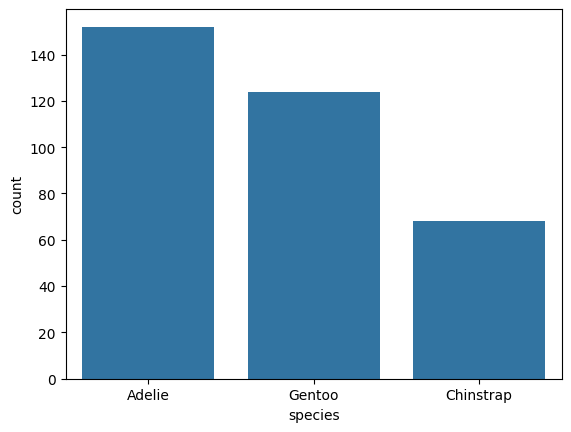

In [8]:
sns.barplot(data=species_count, x='species',y='count')

## Definir el tamaño del canvas

Podemos definir la grilla y el tamaño del canvas con la función 
```
plt.subplots(filas:int,columnas:int,*kwargs:any)
```

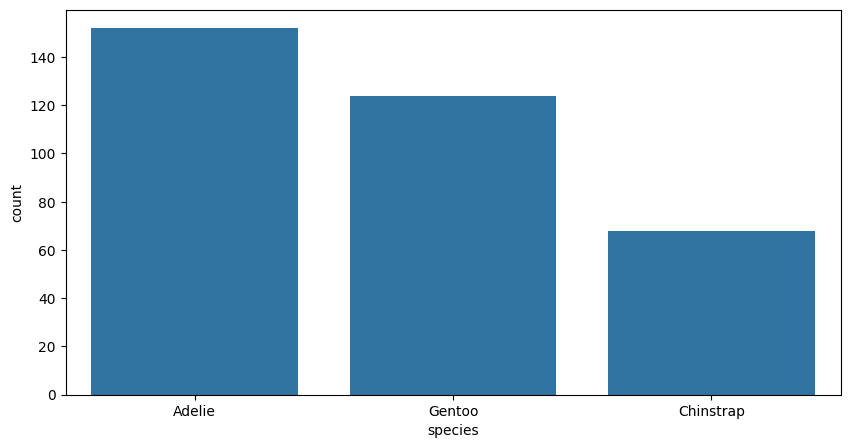

In [35]:
fig, ax = plt.subplots(1, 1, figsize=[10, 5])

ax = sns.barplot(data=species_count, x='species',y='count')

plt.show()

## Definir el título del canvas

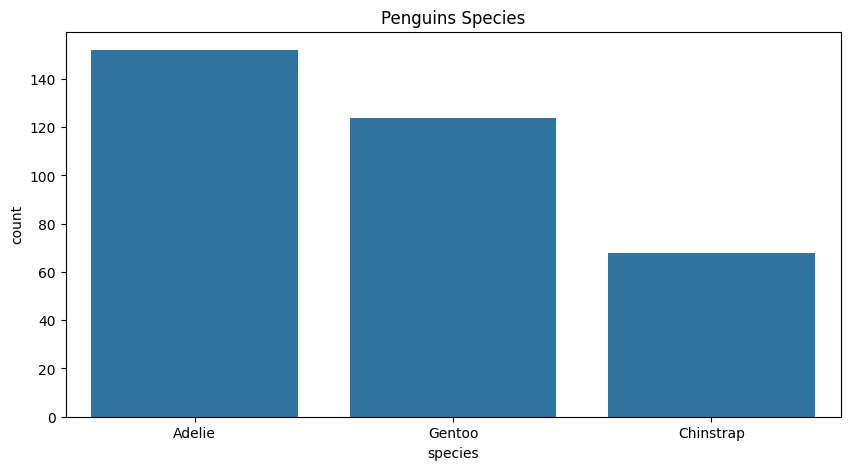

In [56]:
fig, ax = plt.subplots(1, 1, figsize=[10, 5])

ax = sns.barplot(data=species_count, x='species',y='count')

plt.title('Penguins Species')
plt.show()

## Mostrar más de un elemento en una fila o columna

Para mostrar más de un elemento en el mismo canvas debemos: 
1. usar la función `plt.subplots()`
2. definir la cantidad de filas y columnas
3. crear nuestro gráfico pasando el argumento `ax=axes[n]`  
    donde _n_ es el índice de la posición

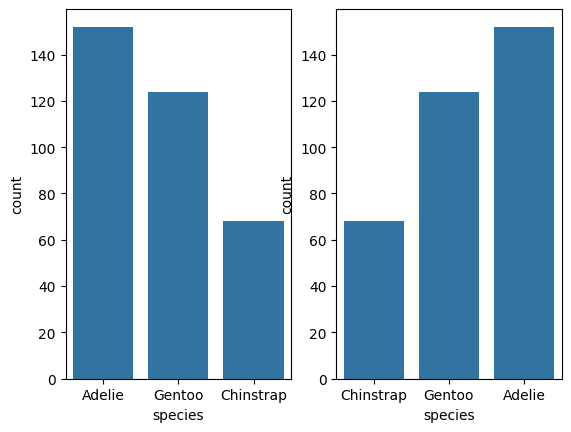

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2)

ax0 = sns.barplot(data=species_count, x='species',y='count', ax=axes[0])

ax1 = sns.barplot(data=species_count.sort_values(by='count',ascending=True), x='species',y='count', ax=axes[1])

plt.show()

## Mostrar más de un elemento en varias filas y columnas

Para mostrar más de un elemento en el mismo canvas debemos: 
1. usar la función `plt.subplots()`
2. definir la cantidad de filas y columnas
3. crear nuestro gráfico pasando el argumento `ax=axes[n_row,n_col]` si vamos a generar múltiples filas y columnas
    donde _nrow_ es el índice de la fila y _ncol_ el índice de la columna

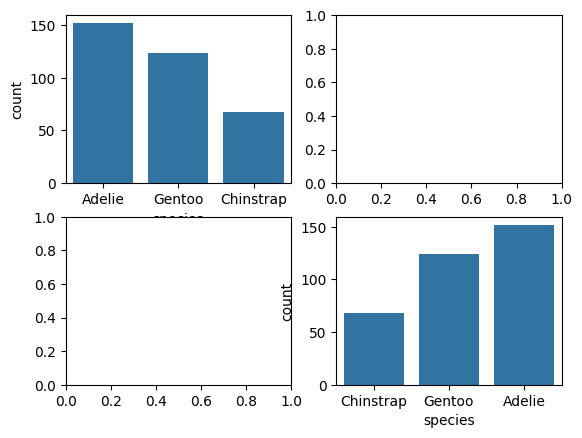

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2)

ax0 = sns.barplot(data=species_count, x='species',y='count', ax=axes[0,0])

ax1 = sns.barplot(data=species_count.sort_values(by='count',ascending=True), x='species',y='count', ax=axes[1,1])

plt.show()

## Agregar título a nuestro gráfico

Usamos la función `plt.title(titulo:str)`

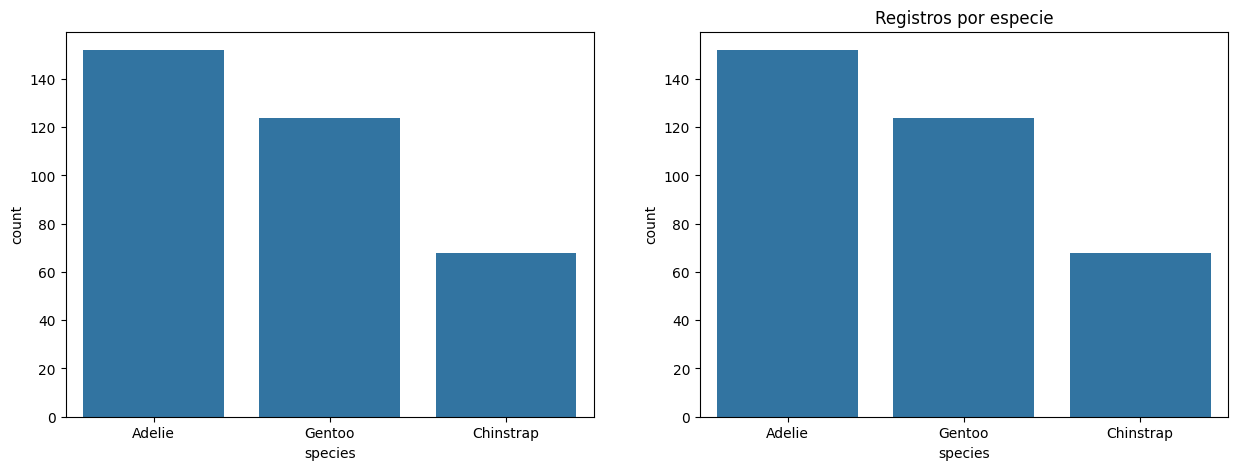

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

axes0 = sns.barplot(data=species_count, x='species',y='count', ax=axes[0])

axes1 = sns.barplot(data=species_count, x='species',y='count', ax=axes[1])
axes1.set_title('Registros por especie')

plt.show()

## Agregar valores en el gráfico

Cada gráfico tiene un objeto que agrupa los `artists` (elementos a renderizarse).  
Por cada `artist` debemos setear el label correspondiente en nuestro gráfico.

La documentación también nos indica que podemos personalizar estas etiquetas

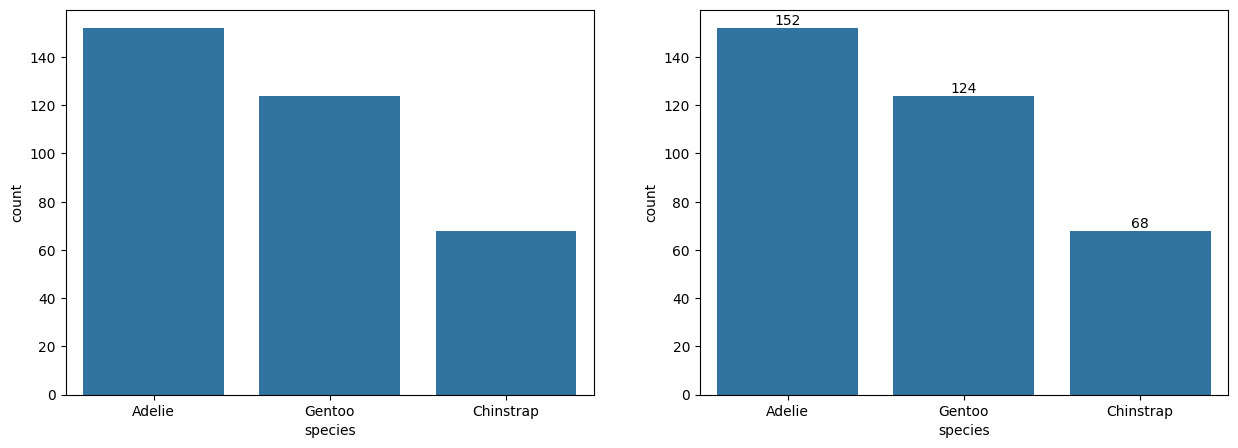

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

axes0 = sns.barplot(data=species_count, x='species',y='count', ax=axes[0])

axes1 = sns.barplot(data=species_count, x='species',y='count', ax=axes[1])

for i in axes1.containers:
    axes1.bar_label(i,)

## Mostrar valores según umbrales

A veces solo necesitamos mostrar los valores que sean más relevantes o se encuentren entre cierto rango que nos interesa.

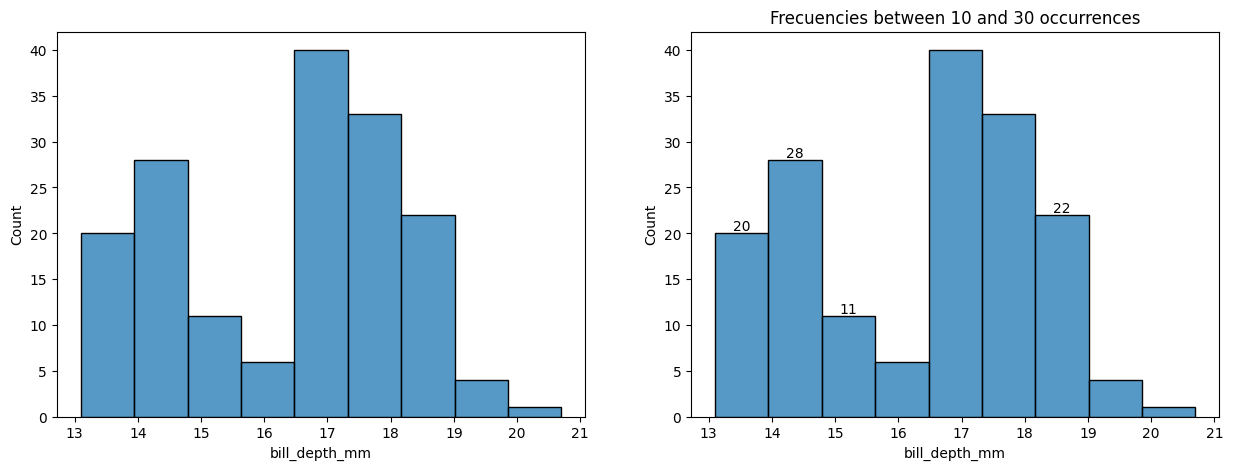

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

axes0 =sns.histplot(df[df['sex'] == 'Female']['bill_depth_mm'], ax=axes[0])
axes1 =sns.histplot(df[df['sex'] == 'Female']['bill_depth_mm'], ax=axes[1])
axes1.set_title('Frecuencies between 10 and 30 occurrences')

for i in axes1.containers:
    labels = [value if (value>=10 and value<=30) else "" for value in i.datavalues]
    axes1.bar_label(i,labels=labels)


## Quitar valores del eje y

Cuando creamos nuestro gráfico, debemos setear con un array vacío las marcas de referencia y sus etiquetas de nuestro eje y usando la función
```
set_yticks(array:np.arr)
```

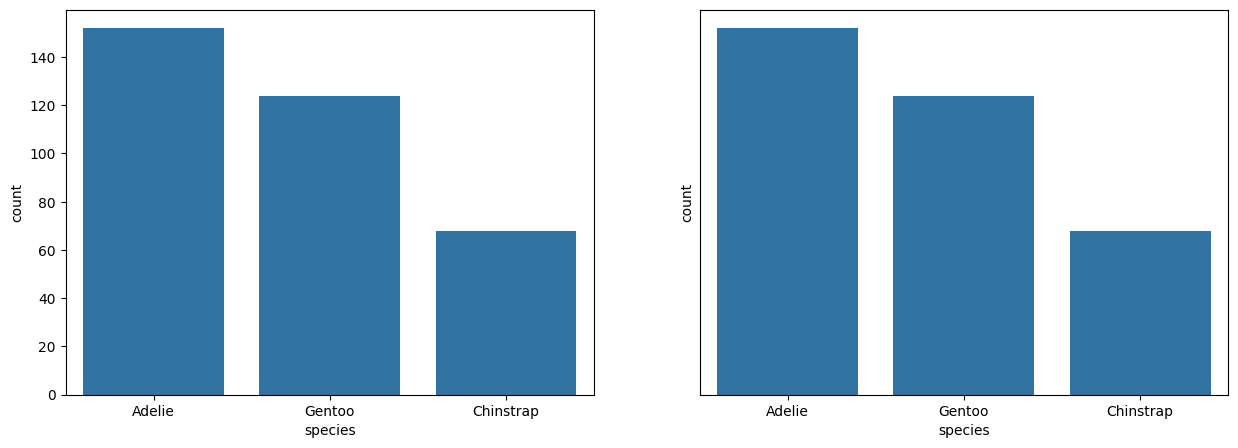

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

axes0 = sns.barplot(data=species_count, x='species',y='count', ax=axes[0])

axes1 = sns.barplot(data=species_count, x='species',y='count', ax=axes[1])
axes1.set_yticks([])

plt.show()

## Quitar titulos de los ejes

Podemos omitir los títulos de cada eje usando `None` como argumento en las funciones
```
set_ylabel(titulo_del_eje:str)
set_xlabel(titulo_del_eje:str)
```

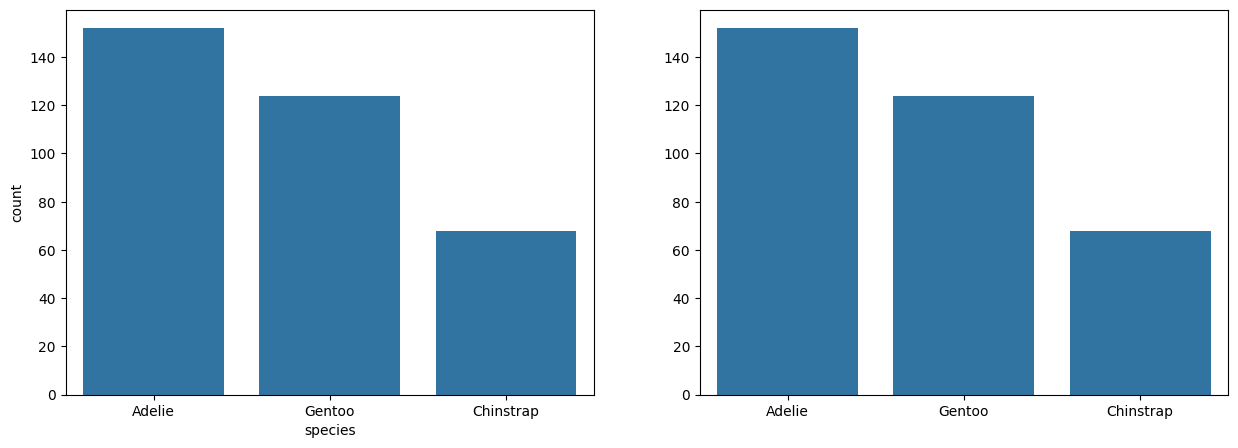

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

axes0 = sns.barplot(data=species_count, x='species',y='count', ax=axes[0])

axes1 = sns.barplot(data=species_count, x='species',y='count', ax=axes[1])
axes1.set_ylabel(None)
axes1.set_xlabel(None)

plt.show()

También podemos moificarlos pasando el texto que querramos como argumento en las mismas funciones

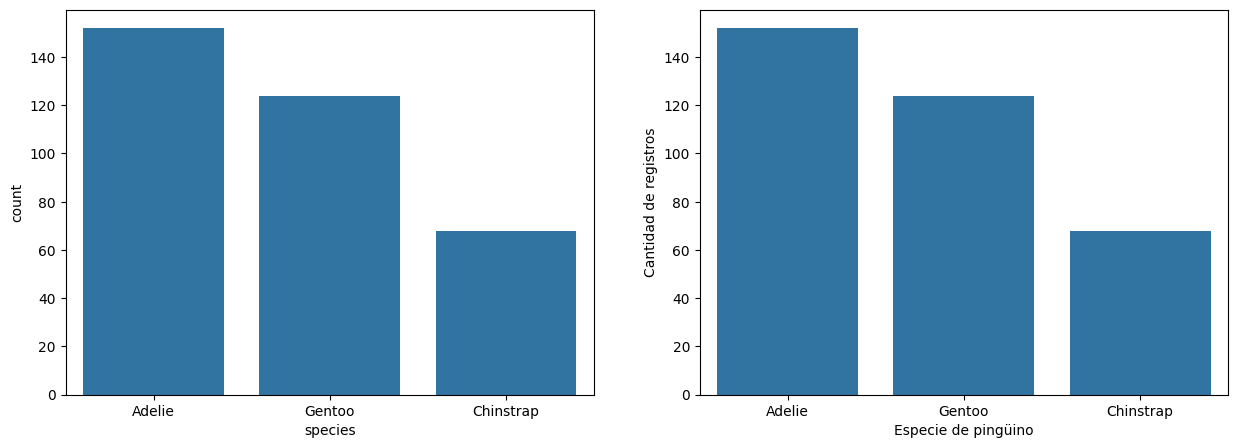

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

axes0 = sns.barplot(data=species_count, x='species',y='count', ax=axes[0])

axes1 = sns.barplot(data=species_count, x='species',y='count', ax=axes[1])
axes1.set_ylabel('Cantidad de registros')
axes1.set_xlabel('Especie de pingüino')

plt.show()

## Cambiar el formato de número del eje

Podemos cambiarlo combinando las funciones `yaxis.set_major_formatter()` para definir el formato del eje y `mtick.StrMethodFormatter()` para transformar los valores por defecto al formato que elijamos
```
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.1f}'))
```
La documentación de cómo transformar formatos de texto la encontrás [aquí](https://docs.python.org/3/library/stdtypes.html#str.format)

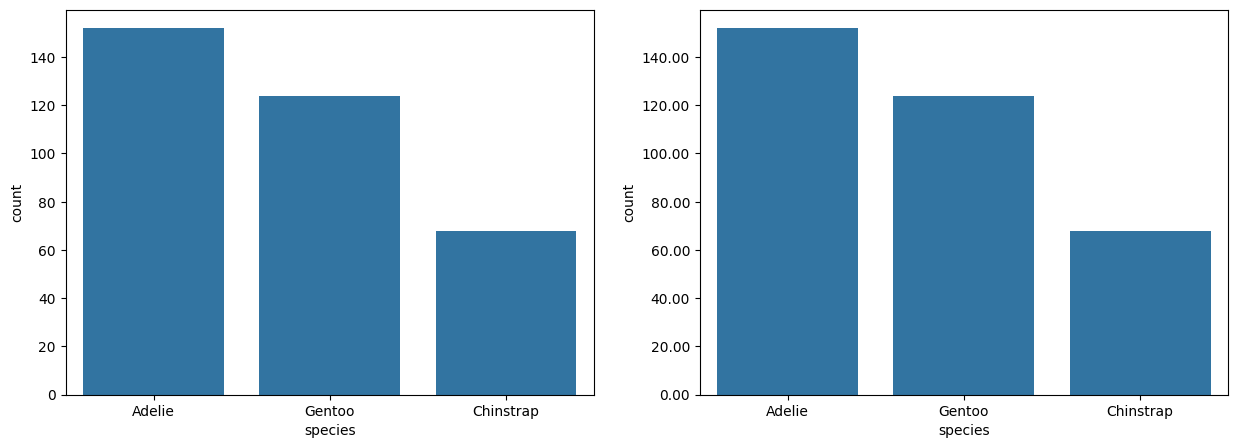

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

axes0 = sns.barplot(data=species_count, x='species', y='count', ax=axes[0])

axes1 = sns.barplot(data=species_count, x='species', y='count', ax=axes[1])
axes1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.1f}'))

plt.show()